<a href="https://colab.research.google.com/github/rasulamirov/ML/blob/main/CompareML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preparing data

In [ ]:
data = pd.read_csv(r"learningDataSetIdeal.csv", delimiter=';', header=None)
data.rename(columns={0:'Velocity', 1:'Alpha',2:'Actual Hit',3:'Predicted Hit'}, inplace=True)

data_test = pd.read_csv(r"verifDataSetIdeal.csv", delimiter=';', header=None)
data_test.rename(columns={0:'Velocity', 1:'Alpha',2:'Actual Hit',3:'Predicted Hit'}, inplace=True)

data_noisy = pd.read_csv(r"learningDataSetNoisy.csv", delimiter=';', header=None)
data_noisy.rename(columns={0:'Velocity', 1:'Alpha',2:'Actual Hit',3:'Predicted Hit'}, inplace=True)

In [ ]:
data[data['Predicted Hit']!=data['Actual Hit']]

,Velocity,Alpha,Actual Hit,Predicted Hit


In [ ]:
X = data[['Velocity', 'Alpha']]
Y = data['Actual Hit']

X_test = data_test[['Velocity', 'Alpha']]
Y_test = data_test['Actual Hit']

X_noisy = data_noisy[['Velocity', 'Alpha']]
Y_noisy = data_noisy['Actual Hit']

# Some functions

In [ ]:
def mix(df_old, Y_pred):
    new_df = df_old[['Velocity', 'Alpha', 'Actual Hit']]
    new_df['Y_pred'] = Y_pred
    return new_df

In [ ]:
def plotResult(df):
    blue_dot = df[(df['Y_pred']== 1.0) & (df['Actual Hit'] == 1.0)]
    blue_cross = df[(df['Y_pred']== 0.0) & (df['Actual Hit'] == 1.0)]
    red_cross = df[(df['Y_pred']== 1.0) & (df['Actual Hit'] == 0.0)]
    red_dot = df[(df['Y_pred']== 0.0) & (df['Actual Hit'] == 0.0)]


    plt.figure(figsize=(14,10))
    plt.scatter(blue_dot['Velocity'],blue_dot['Alpha'] , marker='.', c='b', label='Hit+/Pred+', s=100)
    plt.scatter(blue_cross['Velocity'],blue_cross['Alpha'] , marker='x', c='cyan', label='Hit+/Pred-', s=100)
    plt.scatter(red_cross['Velocity'],red_cross['Alpha'] , marker='x', c='r', label='Hit-/Pred+', s=100)
    plt.scatter(red_dot['Velocity'],red_dot['Alpha'] , marker='.', c='r', label='Hit-/Pred-', s=100)

    plt.xlabel('Velocity')
    plt.ylabel('Alpha')
    plt.title('Hit vs non-hit')
    plt.legend(loc='upper right')
    plt.show()

# Training on ideal

In [ ]:
neigh = KNeighborsClassifier()
dec_tree = DecisionTreeClassifier()
rnd_forest = RandomForestClassifier()

neigh.fit(X,Y)
dec_tree.fit(X,Y)
rnd_forest.fit(X,Y)


RandomForestClassifier()

# Training on noisy

In [ ]:
neigh_noisy = KNeighborsClassifier()
# With default parameters, Tree and Forest are worse on learning from the noisy data
dec_tree_noisy = DecisionTreeClassifier()
rnd_forest_noisy = RandomForestClassifier()

neigh_noisy.fit(X_noisy,Y_noisy)
dec_tree_noisy.fit(X_noisy,Y_noisy)
rnd_forest_noisy.fit(X_noisy,Y_noisy)

RandomForestClassifier()

# Predicting and table creation

## Ideal training data - predictions on the training itself

In [ ]:
Y_pred_neigh = neigh.predict(X)
Y_pred_tree = dec_tree.predict(X)
Y_pred_forest = rnd_forest.predict(X)
###################################
df_neigh = mix(data, Y_pred_neigh)
df_tree = mix(data, Y_pred_tree)
df_forest = mix(data, Y_pred_forest)

## Test of ideal data - each df containts predictions and answers

In [ ]:
Y_pred_neigh_test = neigh.predict(X_test)
Y_pred_tree_test = dec_tree.predict(X_test)
Y_pred_forest_test = rnd_forest.predict(X_test)
############################################
df_neigh_test = mix(data_test, Y_pred_neigh_test)
df_tree_test = mix(data_test, Y_pred_tree_test)
df_forest_test = mix(data_test, Y_pred_forest_test)

## Noisy Data

In [ ]:
Y_pred_neigh_noisy = neigh_noisy.predict(X_test)
Y_pred_tree_noisy = dec_tree_noisy.predict(X_test)
Y_pred_forest_noisy = rnd_forest_noisy.predict(X_test)
##################################################
df_neigh_noisy = mix(data_test, Y_pred_neigh_noisy)
df_tree_noisy = mix(data_test, Y_pred_tree_noisy)
df_forest_noisy = mix(data_test, Y_pred_forest_noisy)

# Training Plot - no data manipulations

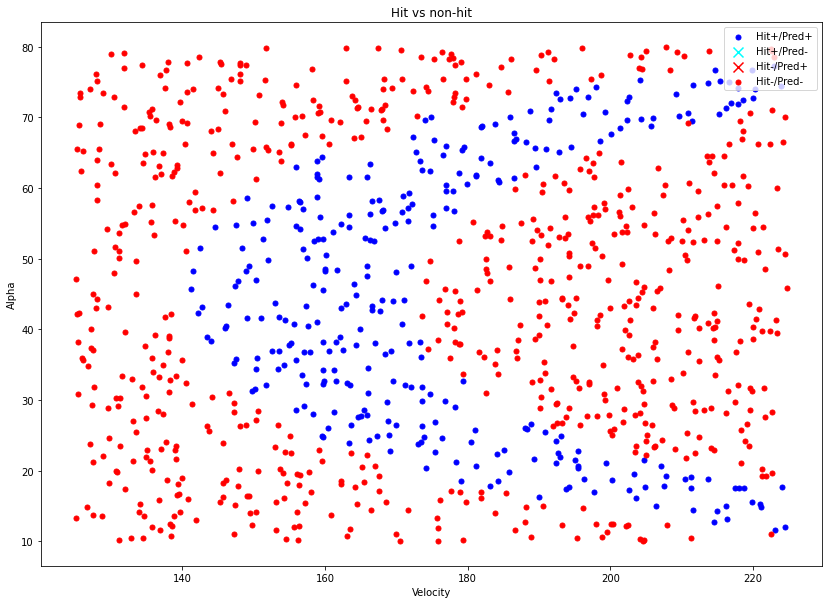

In [ ]:
plotResult(df_forest)

# Testing Plot

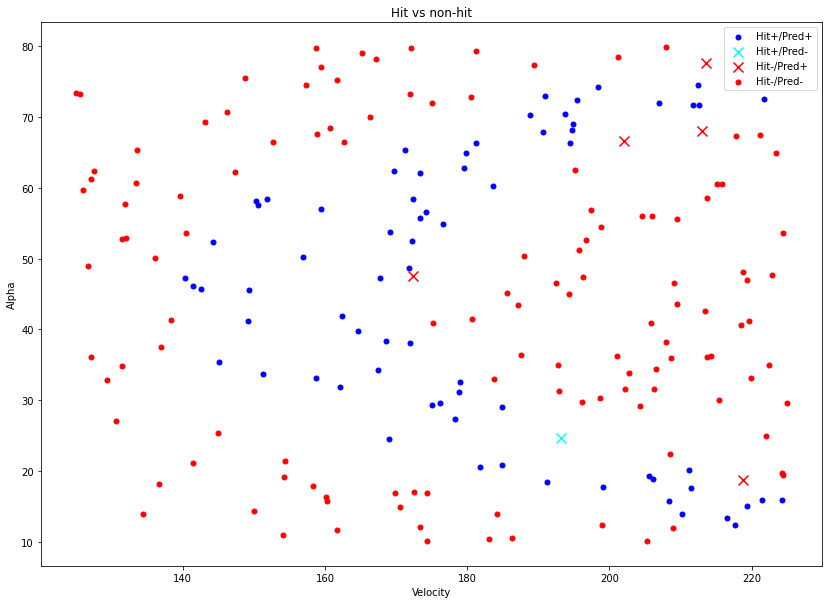

In [ ]:
plotResult(df_neigh_test)

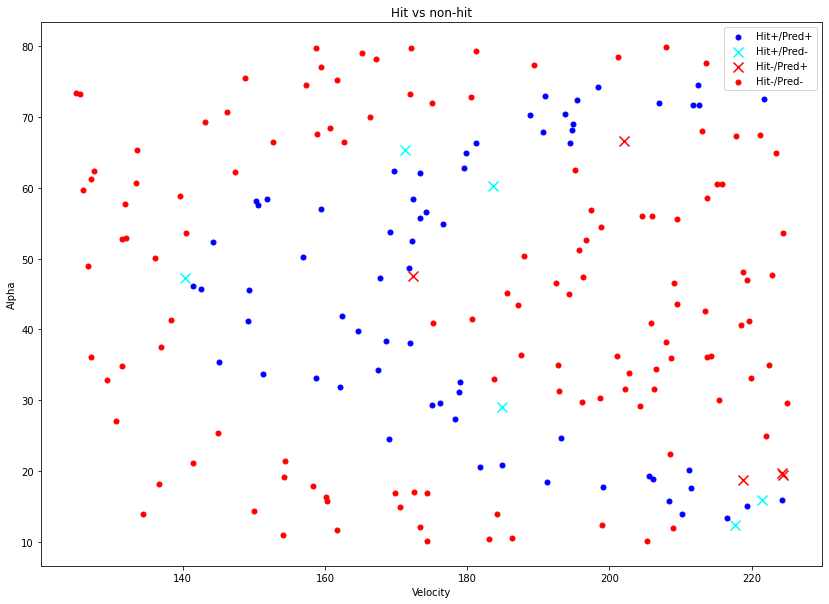

In [ ]:
plotResult(df_tree_test)


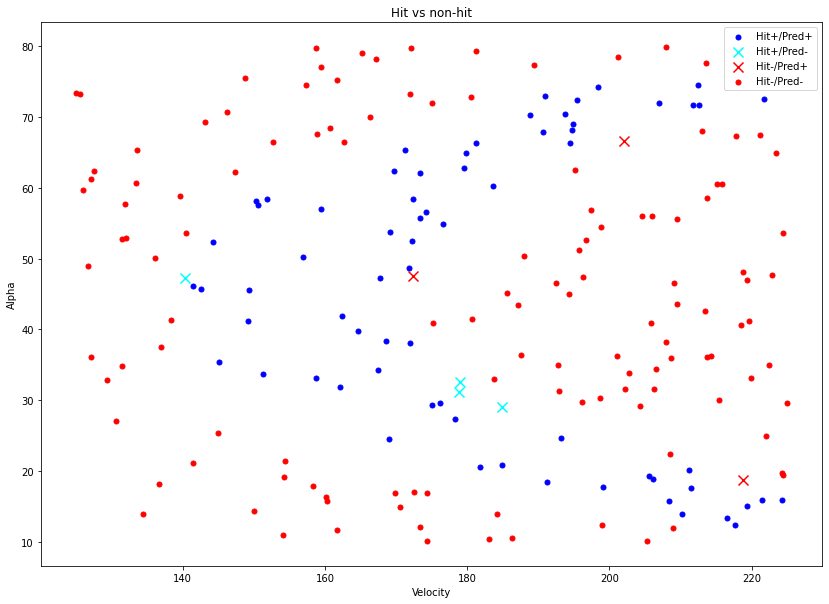

In [ ]:
plotResult(df_forest_test)


# Noisy data

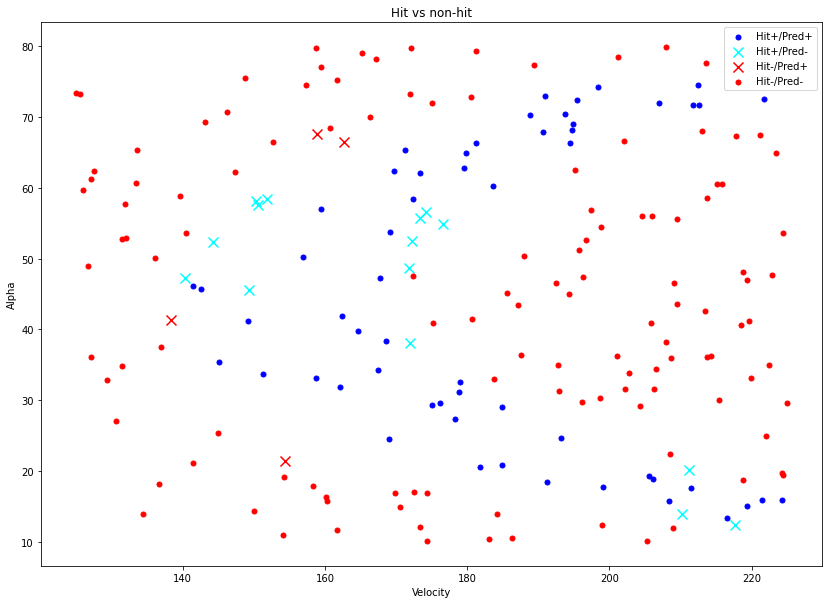

In [ ]:
plotResult(df_forest_noisy)

# Decision tree diagram

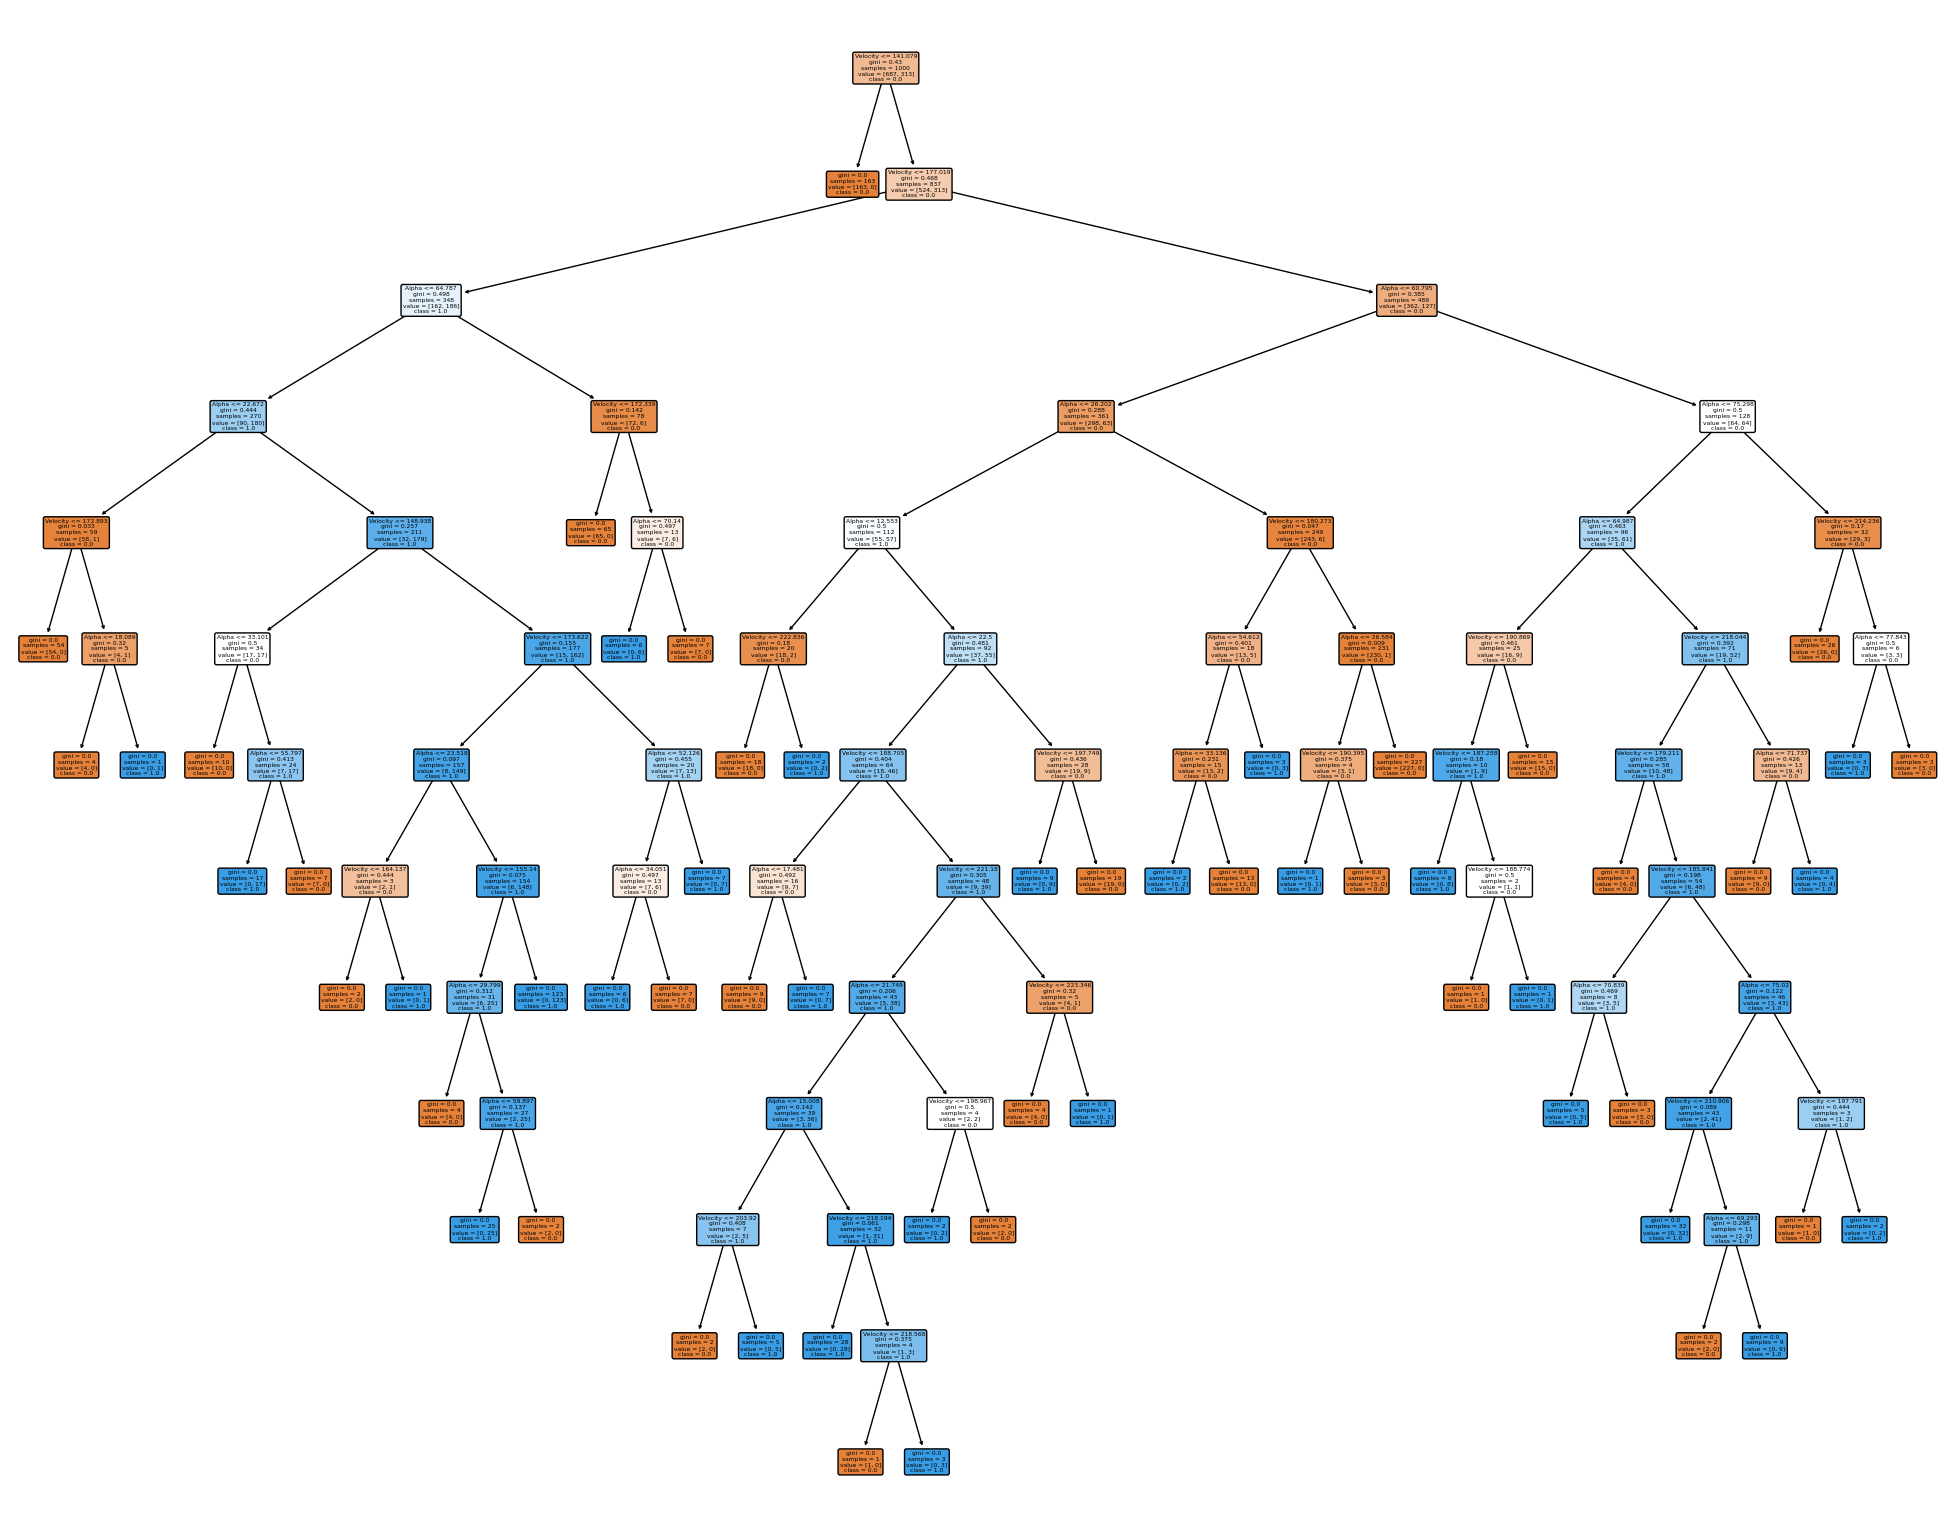

In [ ]:
fig = plt.figure(figsize=(25,20),dpi=100)
_ = plot_tree(dec_tree, 
                   feature_names=['Velocity', 'Alpha'],  
                   class_names=['0.0','1.0'],
                    rounded=True,
                   filled=True)

# Confusion matrix

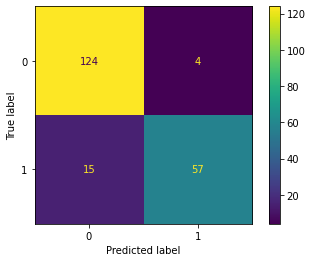

In [ ]:
conf_matrix = metrics.confusion_matrix(df_forest_noisy['Actual Hit'],df_forest_noisy['Y_pred'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix)#, display_labels = [False, True])
cm_display.plot()
plt.show()

# A function somulatinng this stuff - doesn't seem to work
$$
f(\alpha) = \sqrt{\frac{g}{2}}\cdot \frac{1}{\sin{\alpha}\sqrt{\tan{\alpha}+0.01}}
$$
$$

\begin{equation}
  g(V_0, \alpha) =
    \begin{cases}
      1.0 , & \text{if $\frac{V_0}{3000} < f(\alpha)< \frac{V_0}{2000}$}\\
      0.0 , & \text{ otherwise}
    \end{cases}       
\end{equation}
$$

In [ ]:
def g(V0, alpha):
    V0 = V0/1000.0
    f = np.sqrt(9.81/2.0)*1/(np.sin(np.radians(alpha))*np.sqrt(np.tan(alpha)+10))
    a = f.lt(V0/2000.0)
    b = f.gt(V0/3000.0)
    return a*b

In [ ]:
g(X['Velocity'].head(10), X['Alpha'].head(10))

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [ ]:
data.head(10)

,Velocity,Alpha,Actual Hit,Predicted Hit
0,223.149688,11.559859,1.0,1.0
1,139.924764,69.501014,0.0,0.0
2,166.608436,43.345471,1.0,1.0
3,222.906284,77.186904,1.0,1.0
4,179.334117,10.242310,0.0,0.0
5,168.637569,29.686281,1.0,1.0
6,184.715537,77.096718,0.0,0.0
7,182.549729,30.970901,0.0,0.0
8,172.130347,57.706216,1.0,1.0
9,142.499158,51.541908,1.0,1.0


In [ ]:
g(pd.Series([223.149688]), pd.Series([11.559859]))

0    False
dtype: bool

In [ ]:
print('Acciracy of noisy neighbour', metrics.accuracy_score(df_neigh_noisy['Actual Hit'],df_neigh_noisy['Y_pred']))
print('Acciracy of noisy tree', metrics.accuracy_score(df_tree_noisy['Actual Hit'],df_tree_noisy['Y_pred']))
print('Acciracy of noisy forest', metrics.accuracy_score(df_forest_noisy['Actual Hit'],df_forest_noisy['Y_pred']))


Acciracy of noisy neighbour 0.93
Acciracy of noisy tree 0.86
Acciracy of noisy forest 0.905


# Classification reports

In [ ]:
print(metrics.classification_report(df_neigh_noisy['Actual Hit'],df_neigh_noisy['Y_pred']))#Neighbour is the best for noisy
print(metrics.classification_report(df_tree_noisy['Actual Hit'],df_tree_noisy['Y_pred']))
print(metrics.classification_report(df_forest_noisy['Actual Hit'],df_forest_noisy['Y_pred']))


              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       128
         1.0       0.94      0.86      0.90        72

    accuracy                           0.93       200
   macro avg       0.93      0.91      0.92       200
weighted avg       0.93      0.93      0.93       200

              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89       128
         1.0       0.84      0.75      0.79        72

    accuracy                           0.86       200
   macro avg       0.86      0.84      0.84       200
weighted avg       0.86      0.86      0.86       200

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93       128
         1.0       0.93      0.79      0.86        72

    accuracy                           0.91       200
   macro avg       0.91      0.88      0.89       200
weighted avg       0.91      0.91      0.90       200



In [ ]:
print(metrics.classification_report(df_neigh_test['Actual Hit'],df_neigh_test['Y_pred']))#Neighbour is the best for noisy
print(metrics.classification_report(df_tree_test['Actual Hit'],df_tree_test['Y_pred']))
print(metrics.classification_report(df_forest_test['Actual Hit'],df_forest_test['Y_pred']))


              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98       128
         1.0       0.93      0.99      0.96        72

    accuracy                           0.97       200
   macro avg       0.96      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96       128
         1.0       0.93      0.92      0.92        72

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       128
         1.0       0.96      0.94      0.95        72

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



# Voting classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
voting_clf = VotingClassifier(
    estimators=[('nb', neigh),('fr', rnd_forest)],
    voting='soft')

voting_clf.fit(X,Y)

VotingClassifier(estimators=[('nb', KNeighborsClassifier()),
                             ('fr', RandomForestClassifier())],
                 voting='soft')

In [ ]:
Y_pred_vote = voting_clf.predict(X_test)
df_vote = mix(data_test, Y_pred_vote)


In [ ]:
print(metrics.classification_report(df_vote['Actual Hit'],df_vote['Y_pred']))#Neighbour is the best for noisy


              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       128
         1.0       0.96      0.97      0.97        72

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.98      0.97      0.98       200



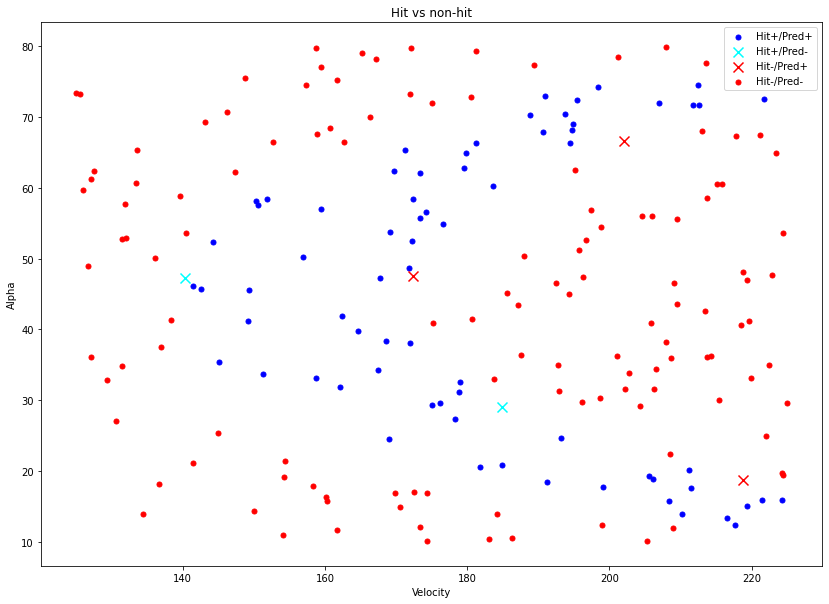

In [ ]:
plotResult(df_vote)


In [ ]:
data_copy = data.copy()

In [ ]:
print(data_copy==data)

     Velocity  Alpha  Actual Hit  Predicted Hit
0        True   True        True           True
1        True   True        True           True
2        True   True        True           True
3        True   True        True           True
4        True   True        True           True
..        ...    ...         ...            ...
995      True   True        True           True
996      True   True        True           True
997      True   True        True           True
998      True   True        True           True
999      True   True        True           True

[1000 rows x 4 columns]


In [ ]:
data_copy.rename(columns={'Predicted Hit':'Y_pred'}, inplace=True)

In [ ]:
data_copy.head()

,Velocity,Alpha,Actual Hit,Y_pred
0,223.149688,11.559859,1.0,1.0
1,139.924764,69.501014,0.0,0.0
2,166.608436,43.345471,1.0,1.0
3,222.906284,77.186904,1.0,1.0
4,179.334117,10.242310,0.0,0.0


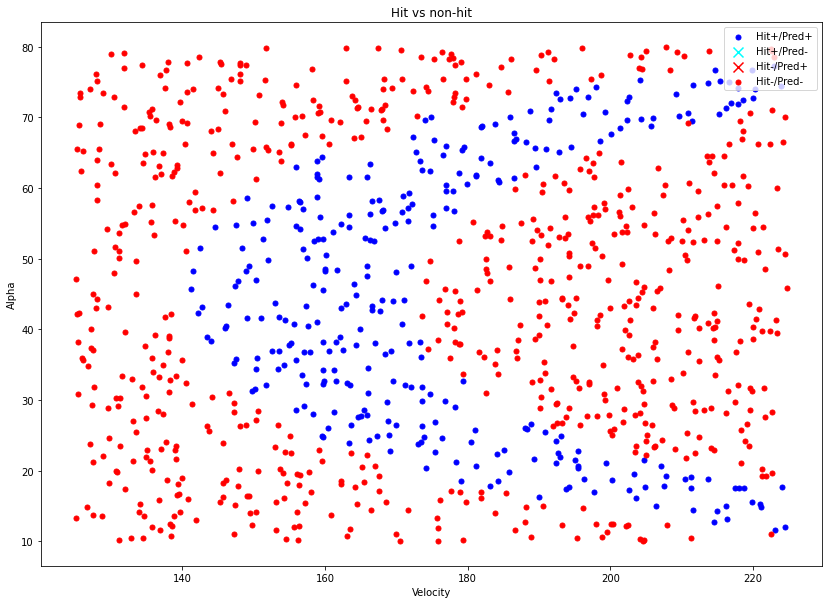

In [ ]:
plotResult(data_copy)

In [ ]:
print(metrics.classification_report(data_copy['Actual Hit'],data_copy['Y_pred']))#Neighbour is the best for noisy


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       687
         1.0       1.00      1.00      1.00       313

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

